# Data Collection

In [1]:
import feedparser
import json
from gensim.summarization import summarize
import re
import string

    # Function to fetch the rss feed and return the parsed RSS
def parseRSS( rss_url ):
    return feedparser.parse( rss_url ) 

# Function grabs the rss feed headlines (titles) and returns them as a list
def getHeadlines( rss_url ):
    headlines = []
    feed = parseRSS( rss_url )
    for newsitem in feed['items']:
        headlines.append(newsitem['title'])

    return headlines
def getDesc( rss_url ):
    descr = []
    feed = parseRSS( rss_url )
    for newsitem in feed['items']:
        descr.append(newsitem['description'])

    return descr




In [2]:
allheadlines = []
allkeys = []
allheadDesc = []
# List of RSS feeds that we will fetch and combine
newsurls = {
    'Jason Calicanis':       'https://calacanis.com/feed/',
    'AngelList':        'https://angellist.tumblr.com/rss',
    'Funded':             'http://funded.blogspot.com/feeds/posts/default',
    '20 minu':           'https://thetwentyminutevc.com/feed/',
    'a16 z':             'https://a16z.com/feed/',
    'A VC':                 'https://avc.com/feed/',
    'Both Sides of the Table': 'https://bothsidesofthetable.com/feed',
    'Going VC':   'https://www.goingvc.com/feed/'   
}
# Iterate over the feed urls
for key,url in newsurls.items():
    # Call getHeadlines() and combine the returned headlines with allheadlines
    allheadlines.extend( getHeadlines( url ) )
    allkeys.extend(getHeadlines( key ))
for key,url in newsurls.items():
    # Call getHeadlines() and combine the returned headlines with allheadlines
    allheadDesc.extend( getDesc( url ) )

# DATA CLEANING

In [3]:
def clean_text_round1(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>' ,'',text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('&#;No&#','',text)
    text = re.sub('&#','',text)
    text = re.sub(r"\u200a", "", text)
    text = re.sub(r"\u200b","",text)
    text = re.sub(r"\u200c","",text)    
    text = re.sub(r"\u20b9","",text)
    text = re.sub(r"\u2012","",text)
    text = re.sub(r"<[^>]*>"," ",text)
    text = re.sub(r"\xa0","",text)
    text = re.sub(r"&rsquo;s","",text)
    text = re.sub(r"\d+;", " ", text)
    text = re.sub(r"\xa0","",text)
    return text



# Main Code

total_number of news: 78 


[('Jason Calacanis', 'PERSON')]


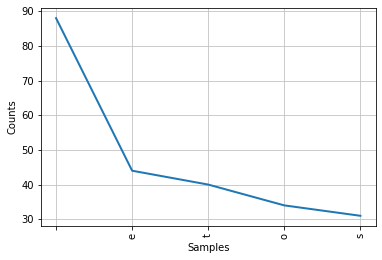

[('Kevin Rose', 'PERSON'), ('Tim Ferris', 'PERSON'), ('The Random Show', 'WORK_OF_ART'), ('Tim Ferris', 'PERSON'), ('Tim', 'PERSON'), ('Kevin', 'PERSON'), ('Continue', 'PERSON'), ('Five', 'CARDINAL'), ('Five', 'CARDINAL'), ('Jason Calacanis', 'PERSON')]


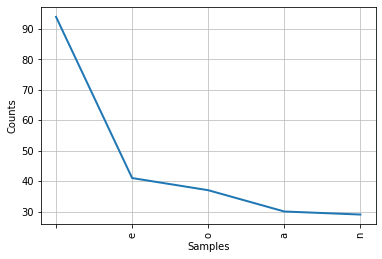

[('Silicon Valley', 'LOC'), ('Airbnb', 'GPE'), ('Uber', 'PERSON'), ('Slack', 'PERSON'), ('tens of billions', 'MONEY'), ('Continue', 'PERSON'), ('The Pegasus Startup: Flying Over', 'WORK_OF_ART'), ('the Wings of Profits  ', 'WORK_OF_ART'), ('The Pegasus Startup:', 'WORK_OF_ART'), ('the Wings of Profits', 'WORK_OF_ART'), ('Jason Calacanis', 'PERSON')]


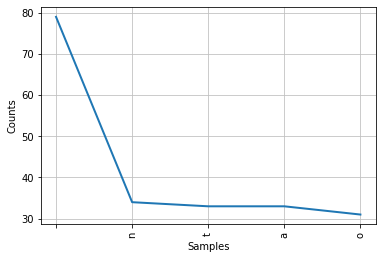

[('Saudi Arabias', 'ORG'), ('Masas Vision Fund', 'ORG'), ('Kingdom', 'GPE'), ('at least one', 'CARDINAL'), ('200', 'CARDINAL'), ('Masas Vision Fund   ', 'ORG'), ('Saudi', 'NORP'), ('Masas Vision Fund', 'ORG'), ('Saudi', 'NORP'), ('Masas Vision Fund', 'ORG'), ('first', 'ORDINAL'), ('Jason Calacanis', 'PERSON')]


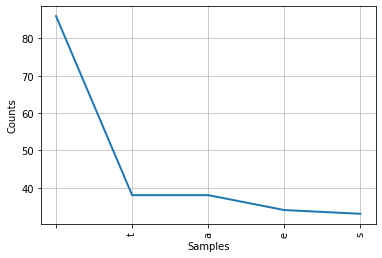

[('the first year or two', 'DATE'), ('Startup', 'ORG'), ('Continue', 'PERSON'), ('Traction Matrix', 'PERSON'), ('Traction Matrix', 'PERSON'), ('first', 'ORDINAL'), ('Jason Calacanis', 'PERSON')]


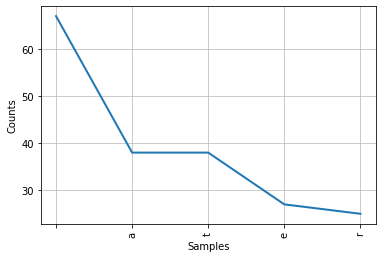

[('LAUNCH', 'ORG'), ('LAUNCH Accelerator', 'PERSON'), ('Jason s Syndicate', 'PERSON'), ('SCALE', 'ORG'), ('LAUNCH Festival', 'EVENT'), ('Angel Summit', 'ORG'), ('first', 'ORDINAL'), ('Jason Calacanis', 'PERSON')]


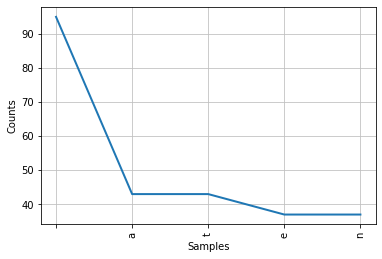

[('10,000', 'CARDINAL'), ('ANGEL', 'ORG'), ('half-day', 'DATE'), ('Angel University', 'ORG'), ('Continue', 'PERSON'), ('first', 'ORDINAL'), ('Jason Calacanis', 'PERSON')]


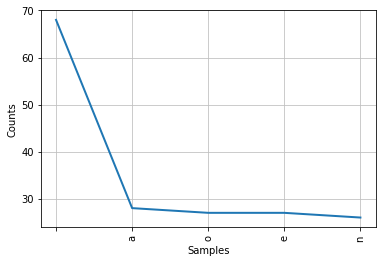

[('the weekend', 'DATE'), ('nine', 'CARDINAL'), ('their 10th, 11th and 12th', 'DATE'), ('Continue', 'PERSON'), ('first', 'ORDINAL'), ('Jason Calacanis', 'PERSON')]


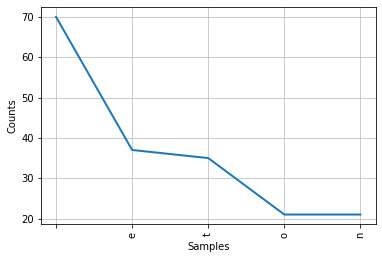

[('Exterior', 'GPE'), ('San Franciscos SOMA', 'GPE'), ('two', 'CARDINAL'), ('JCal', 'PERSON'), ('first', 'ORDINAL'), ('Continue', 'PERSON'), ('Jason Calacanis', 'PERSON')]


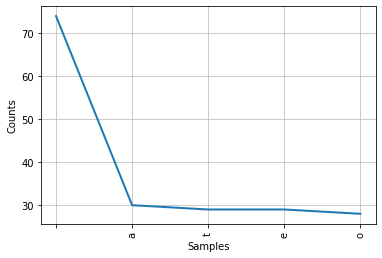

[('Jason Calacanis', 'PERSON')]


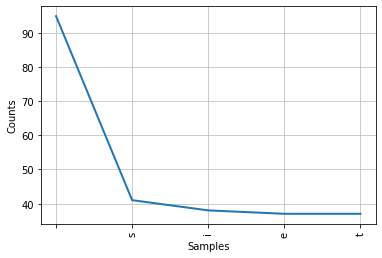

[('fourth', 'ORDINAL'), ('Kirill Makharinsky', 'PERSON'), ('Enki', 'PERSON'), ('Ostrovok', 'ORG'), ('fifteen', 'CARDINAL'), ('TokBox', 'PRODUCT'), ('Telefonica', 'PERSON'), ('AngelList', 'ORG'), ('Kirill', 'PRODUCT'), ('Kirill', 'PRODUCT'), ('tens of thousands', 'CARDINAL'), ('Two', 'CARDINAL'), ('1-2 hours', 'TIME'), ('Tyler Willis', 'PERSON'), ('Tyler Willis', 'PERSON'), ('this year', 'DATE'), ('season one', 'DATE'), ('AngelList Radio', 'ORG'), ('our first season', 'DATE'), ('Today', 'DATE'), ('Kirill Makharinsky', 'PERSON'), ('Kirill', 'PRODUCT'), ('YouNoodle', 'GPE'), ('Quid', 'GPE'), ('Ostrovok', 'GPE'), ('Enki', 'PERSON'), ('tens of millions of dollars', 'MONEY'), ('Ostrovok', 'ORG'), ('over $200 million', 'MONEY'), ('annual', 'DATE'), ('Kirill', 'PRODUCT'), ('almost two hours', 'TIME'), ('YouNoodle', 'GPE'), ('Quid days', 'DATE'), ('San Francisco', 'GPE'), ('London', 'GPE'), ('Russia', 'GPE'), ('today?Kirill Makharinsky', 'PERSON'), ('Russia', 'GPE'), ('UK', 'GPE'), ('Oxford', '

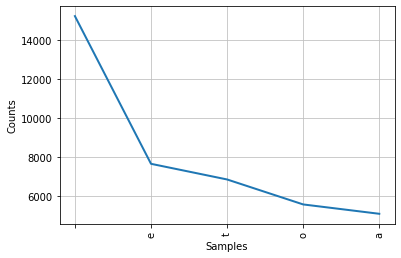

[('third', 'ORDINAL'), ('Jason Calacanis', 'PERSON'), ('Jason', 'PERSON'), ('first', 'ORDINAL'), ('Sequoia Capital', 'ORG'), ('Uber', 'GPE'), ('Thumbtack', 'GPE'), ('over 100', 'CARDINAL'), ('Jason', 'PERSON'), ('Sequoia', 'PERSON'), ('Steve Jobs', 'PERSON'), ('Elon Musk', 'PERSON'), ('Peter Thiel', 'PERSON'), ('57:21', 'TIME'), ('45:57', 'TIME'), ('Jason', 'PERSON'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('AngelList', 'ORG'), ('Tyler Willis', 'PERSON'), ('Tyler Willis', 'PERSON'), ('this year', 'DATE'), ('one', 'CARDINAL'), ('our first season', 'DATE'), ('Today', 'DATE'), ('Jason Calacanis', 'PERSON'), ('you&rsquo;re', 'GPE'), ('Jason', 'PERSON'), ('Uber', 'PERSON'), ('Sequia', 'NORP'), ('EIR', 'ORG'), ('Sequoia Capital', 'ORG'), ('Jason', 'PERSON'), ('billion dollar', 'MONEY'), ('Uber', 'PERSON'), ('Thumbtack', 'PERSON'), ('today', 'DATE'), ('AngelList', 'ORG'), ('a few months ago', 'DATE'), ('Wars&rdquo', 'ORG'), ('Jason', 'PERSON'), ('the me of four months ago', 

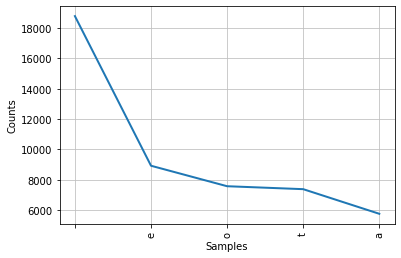

[('second', 'ORDINAL'), ('AngelList Radio', 'ORG'), ('Sumon Sadhu', 'PERSON'), ('Sumon', 'PERSON'), ('Mobius Motors', 'ORG'), ('African', 'NORP'), ('Chaldal', 'PERSON'), ('Bangladeshi', 'NORP'), ('ClearTax', 'ORG'), ('Indian', 'NORP'), ('Billions', 'CARDINAL'), ('first', 'ORDINAL'), ('India', 'GPE'), ('China', 'GPE'), ('Sumon', 'PERSON'), ('Alibaba', 'PERSON'), ('ClearTax', 'GPE'), ('India', 'GPE'), ('Chaldal', 'PERSON'), ('Bangladesh).Academic', 'NORP'), ('five years old', 'DATE'), ('Sumon', 'PERSON'), ('31:00', 'TIME'), ('Sumon', 'PERSON'), ('Chaldal', 'PERSON'), ('Soundcloud', 'PERSON'), ('Sumons', 'NORP'), ('AngelList', 'ORG'), ('Twitterand', 'GPE'), ('Tyler Willis', 'PERSON'), ('Tyler Willis', 'PERSON'), ('season one', 'DATE'), ('our first season', 'DATE'), ('Today', 'DATE'), ('Sumon Sadhu', 'PERSON'), ('first', 'ORDINAL'), ('Quid', 'NORP'), ('$49 million', 'MONEY'), ('Sumon', 'PERSON'), ('today', 'DATE'), ('Sumon', 'PERSON'), ('Sumon Sadhu', 'PERSON'), ('Tyler', 'PERSON'), ('toda

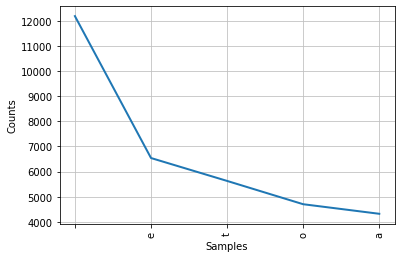

[('2.5%', 'PERCENT'), ('20%', 'PERCENT'), ('CSC Upshot', 'ORG'), ('5', 'MONEY'), ('an additional $195', 'MONEY'), ('CSC Upshot', 'ORG')]


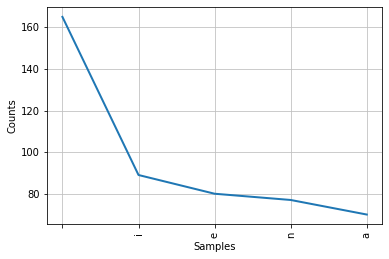

[('first', 'ORDINAL'), ('AngelList Radio', 'ORG'), ('Rick', 'PERSON'), ('Rick', 'PERSON'), ('three', 'CARDINAL'), ('Snapchat', 'GPE'), ('Reddit', 'GPE'), ('Sprig', 'GPE'), ('Luxe', 'PERSON'), ('Wanelo', 'PERSON'), ('over 40', 'CARDINAL'), ('Rick', 'PERSON'), ('30 to 40', 'CARDINAL'), ('at least 20', 'CARDINAL'), ('1-$10', 'MONEY'), ('Rick', 'PERSON'), ('Luxe', 'PERSON'), ('Rick', 'PERSON'), ('three', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('Total Addressable Market', 'ORG'), ('Luxe', 'PERSON'), ('Rick', 'PERSON'), ('Zynga', 'GPE'), ('Rick', 'PERSON'), ('pro rata', 'PERSON'), ('Soundcloud', 'PERSON'), ('Ricks', 'PERSON'), ('AngelList', 'ORG'), ('Rick', 'PERSON'), ('Tyler Willis', 'PERSON'), ('Tyler Willis', 'PERSON'), ('This year', 'DATE'), ('season one', 'DATE'), ('AngelList Radio', 'ORG'), ('our first season', 'DATE'), ('Today', 'DATE'), ('one', 'CARDINAL'), ('AngelList Radio', 'ORG'), ('Rick Marini', 'PERSON'), ('Rick', 'PERSON'), ('Tickle', 'ORG'), ('a

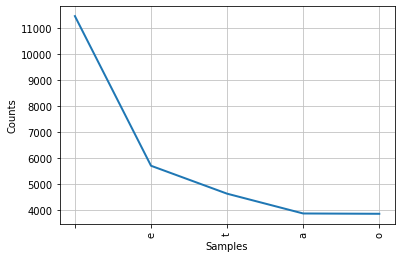

[('CSC Upshot', 'ORG'), ('$400M', 'MONEY'), ('CSC', 'ORG'), ('CSC Upshot', 'ORG'), ('Maiden Lane', 'PERSON'), ('over a year', 'DATE'), ('CSC Upshot', 'ORG'), ('$200K', 'MONEY'), ('Maiden Lane', 'ORG'), ('$50K', 'MONEY'), ('$25K', 'MONEY'), ('Second', 'ORDINAL'), ('AngelList', 'ORG'), ('dealsThese', 'NORP'), ('First', 'ORDINAL'), ('Second', 'ORDINAL'), ('72 hours', 'TIME')]


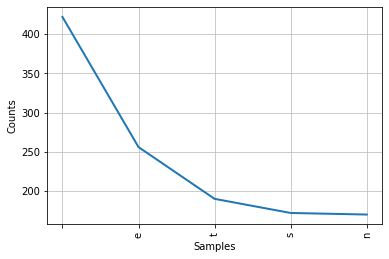

[('AngelList', 'ORG'), ('one', 'CARDINAL'), ('Build', 'NORP'), ('1-person', 'CARDINAL'), ('AngelList', 'ORG'), ('etc.4', 'GPE'), ('Google', 'ORG'), ('5', 'CARDINAL'), ('one', 'CARDINAL'), ('opinionIf', 'CARDINAL'), ('SQL', 'ORG'), ('Slack', 'ORG'), ('6', 'CARDINAL'), ('hackersIf', 'ORG'), ('Slack', 'PRODUCT'), ('one', 'CARDINAL'), ('Trello', 'ORG'), ('experience.10', 'GPE'), ('first', 'ORDINAL'), ('Dave', 'PERSON'), ('Kapil', 'PERSON'), ('Paul', 'PERSON')]


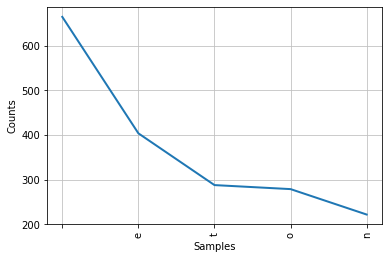

[('Jobs', 'ORG'), ('Tinder', 'ORG'), ('iPhone', 'ORG'), ('8,000', 'CARDINAL'), ('one', 'CARDINAL'), ('Shyp, Twitch', 'ORG'), ('Medium', 'ORG'), ('Uber', 'PERSON'), ('10,000', 'CARDINAL'), ('a week', 'DATE'), ('over half', 'CARDINAL'), ('CSC Upshot', 'ORG'), ('AngelList', 'ORG')]


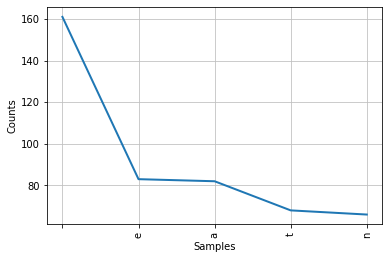

[('Today', 'DATE'), ('CSC Upshot', 'ORG'), ('AngelLists', 'ORG'), ('Accomplice', 'ORG'), ('Slow Ventures', 'ORG'), ('$35M', 'MONEY'), ('19', 'CARDINAL'), ('VC', 'ORG'), ('zero', 'CARDINAL'), ('AngelList', 'ORG'), ('10', 'MONEY'), ('AngelList', 'ORG'), ('SPV', 'PRODUCT'), ('AngelList', 'ORG'), ('SPV', 'ORG'), ('CSC', 'ORG'), ('CSC Upshot', 'ORG'), ('Jobs', 'ORG')]


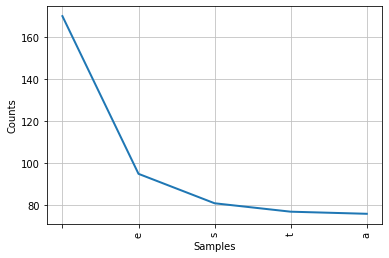

[('today', 'DATE'), ('First', 'ORDINAL'), ('CSC Upshot', 'ORG'), ('400', 'MONEY'), ('AngelList', 'ORG'), ('CSC Upshot', 'ORG'), ('they&rsquo;re', 'PRODUCT'), ('CSC Upshot', 'ORG'), ('205', 'MONEY'), ('4,400', 'CARDINAL'), ('Maiden Lane', 'ORG'), ('25', 'MONEY'), ('Top Tier Capital', 'ORG'), ('Makena', 'GPE'), ('650', 'CARDINAL'), ('Shyp', 'ORG'), ('Sprig', 'NORP'), ('Luxe', 'PERSON'), ('165', 'CARDINAL'), ('Dave Morin', 'PERSON'), ('Elad Gil', 'PERSON'), ('Foundry Group', 'ORG'), ('CSC Upshots', 'ORG'), ('CSC Upshot', 'ORG'), ('CSC Upshots', 'ORG'), ('CSC Upshot', 'ORG'), ('CSC Upshot', 'ORG'), ('Late-Stage InvestmentsAngelList', 'WORK_OF_ART'), ('SPV', 'ORG'), ('CSC Upshot', 'ORG'), ('AngelLists', 'ORG'), ('Accomplice', 'ORG'), ('Slow Ventures', 'ORG'), ('$35M', 'MONEY'), ('19', 'CARDINAL'), ('VC', 'ORG'), ('zero', 'CARDINAL'), ('AngelList', 'ORG'), ('10', 'MONEY'), ('AngelList', 'ORG'), ('SPV', 'ORG'), ('CSC Upshot', 'ORG'), ('iOSWe', 'NORP'), ('Jobs', 'ORG'), ('Tinder', 'ORG'), ('iP

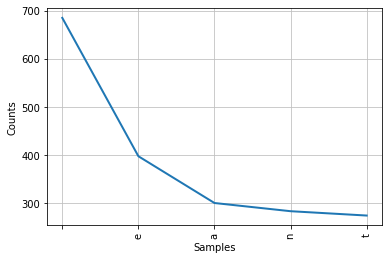

[('Today', 'DATE'), ('first', 'ORDINAL'), ('5 days', 'DATE'), ('3M.', 'MONEY'), ('7-10 days', 'DATE'), ('75%', 'PERCENT'), ('you&rsquo;re', 'PERSON'), ('you&rsquo;re', 'PERSON'), ('FAQ', 'ORG')]


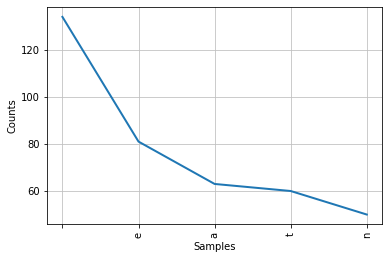

[('2014', 'DATE'), ('AngelList', 'ORG'), ('over $100M', 'MONEY'), ('U.S.', 'GPE'), ('Today', 'DATE'), ('UK', 'GPE'), ('UK', 'GPE'), ('carry.)Over 10 UK', 'ORG'), ('today', 'DATE'), ('Robin Klein', 'PERSON'), ('Index Ventures', 'ORG'), ('Zoopla', 'GPE'), ('Forward Partners', 'ORG'), ('Hailo', 'ORG'), ('Seedcamp', 'GPE'), ('UK', 'GPE'), ('3BN', 'MONEY'), ('UK', 'GPE'), ('UK', 'GPE'), ('UK', 'GPE'), ('2014', 'DATE'), ('Deepmind', 'DATE'), ('a reported $500M+', 'MONEY'), ('NaturalMotion', 'ORG'), ('$527M', 'MONEY'), ('CSR', 'ORG'), ('2.5B.', 'MONEY'), ('UK', 'GPE'), ('Zoopla', 'PERSON'), ('over 5,000', 'CARDINAL'), ('UK', 'GPE'), ('AngelList', 'ORG'), ('UK', 'GPE'), ('UK', 'GPE'), ('SEIS', 'ORG'), ('EIS', 'ORG'), ('30-50%', 'PERCENT'), ('UK', 'GPE')]


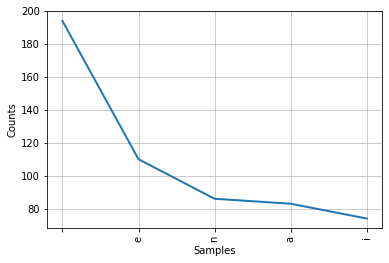

[('one', 'CARDINAL'), ('first', 'ORDINAL'), ('September 2013', 'DATE'), ('Shyp', 'ORG'), ('750,000', 'MONEY'), ('Tim Ferriss', 'PERSON'), ('250,000', 'MONEY'), ('just 53 minutes', 'TIME'), ('July 2014', 'DATE'), ('$10M Series', 'MONEY'), ('Kevin Gibbon', 'PERSON'), ('Tim', 'PERSON'), ('first', 'ORDINAL'), ('iPhone', 'ORG'), ('Android', 'PERSON'), ('about 20 minutes', 'TIME'), ('Amazon', 'GPE'), ('Zappos', 'NORP'), ('Nordstrom', 'PERSON'), ('eBay', 'ORG'), ('Etsy', 'PERSON'), ('Magento', 'PRODUCT'), ('eBay', 'ORG'), ('first', 'ORDINAL'), ('AngelList', 'NORP'), ('this year', 'DATE'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('second', 'ORDINAL'), ('Tim syndicate?Raising', 'PERSON'), ('Tim Ferriss', 'PERSON'), ('Tim', 'PERSON'), ('first', 'ORDINAL'), ('second', 'ORDINAL'), ('Tim', 'PERSON'), ('first', 'ORDINAL'), ('our early days', 'DATE'), ('today', 'DATE'), ('Shyp', 'GPE'), ('AngelList', 'NORP'), ('up to 99', 'CARDINAL'), ('Only one', 'CARDINAL'), ('One', 'CARDINAL'), ('Tim', 'PERSON'

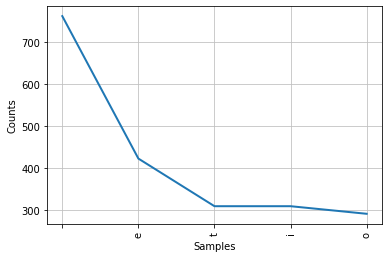

[('300k', 'MONEY'), ('Semyon Dukach', 'ORG'), ('2.2', 'MONEY'), ('Dipul Patel', 'PERSON'), ('Dipul', 'PERSON'), ('Nick', 'PERSON'), ('Yoel', 'GPE'), ('Shawn', 'PERSON'), ('70 Million', 'CARDINAL'), ('one', 'CARDINAL'), ('MIT', 'ORG'), ('Nick', 'PERSON'), ('Shawn', 'PERSON'), ('almost a year', 'DATE'), ('Techstars', 'GPE'), ('Techstars', 'GPE'), ('Nick', 'PERSON'), ('Shawn', 'PERSON'), ('We&rsquo;ve', 'PERSON'), ('Semyon', 'PERSON'), ('Semyon', 'PERSON'), ('a year ago', 'DATE'), ('the first day', 'DATE'), ('Techstars', 'GPE'), ('the first week', 'DATE'), ('Semyon', 'PERSON'), ('Semyon', 'PERSON'), ('AngelList', 'ORG'), ('Atlas Venture', 'PERSON'), ('2MM', 'MONEY'), ('2.2MM', 'MONEY'), ('money?First', 'ORG'), ('Hustle andpersevere', 'PERSON'), ('Android', 'ORG'), ('next year', 'DATE'), ('Ecovent', 'ORG'), ('Ecovent', 'ORG')]


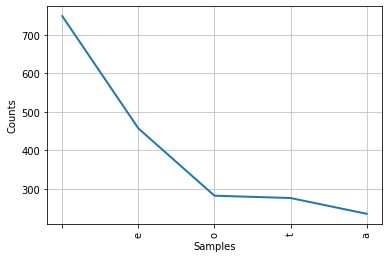

[('OnBeep', 'ORG'), ('250k', 'MONEY'), ('Gil Penchina', 'ORG'), ('this Spring', 'DATE'), ('Jesse', 'PERSON'), ('OnBeep', 'ORG'), ('first', 'ORDINAL'), ('OnBeep', 'ORG'), ('OnBeep', 'ORG'), ('two', 'CARDINAL'), ('Gil syndicate?Gil', 'PERSON'), ('Gil', 'PERSON'), ('Gil', 'PERSON'), ('almost 4x', 'CARDINAL'), ('Gil', 'PERSON'), ('first', 'ORDINAL'), ('a few weeks ago', 'DATE'), ('AngelList', 'ORG'), ('Ihad', 'NORP'), ('dozens', 'CARDINAL'), ('AngelList', 'ORG'), ('helpful?Yes', 'PERSON'), ('AngelList', 'ORG')]


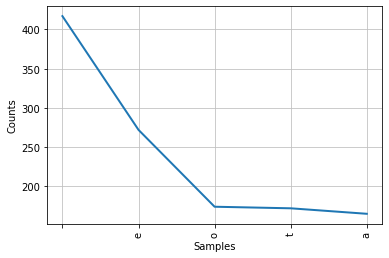

[('Faraday Bicycles', 'ORG'), ('300kthrough', 'MONEY'), ('AngelList', 'ORG'), ('Tom McInerney', 'PERSON'), ('Adam', 'PERSON'), ('Faraday Bicycles', 'ORG'), ('company?Faraday', 'DATE'), ('next February', 'DATE'), ('the bay area', 'LOC'), ('as little as an hour', 'DATE'), ('as long as a week', 'DATE'), ('Tom', 'PERSON'), ('Tom', 'PERSON'), ('Tesla', 'NORP'), ('first', 'ORDINAL'), ('AngelList', 'NORP'), ('Tom', 'PERSON'), ('Faraday', 'NORP'), ('Tom', 'PERSON'), ('Faraday', 'DATE'), ('Tom great network', 'PERSON'), ('a few months ago', 'DATE'), ('first', 'ORDINAL'), ('you&rsquo;re', 'PERSON'), ('Marketing', 'GPE'), ('you&rsquo;re', 'PERSON'), ('touch!Apply to Faraday Bicycles', 'GPE')]


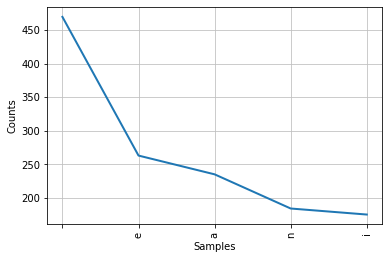

[('one', 'CARDINAL'), ('AngelList', 'NORP'), ('Investor Hub', 'FAC'), ('Updates', 'ORG'), ('today', 'DATE'), ('Hub', 'PERSON')]


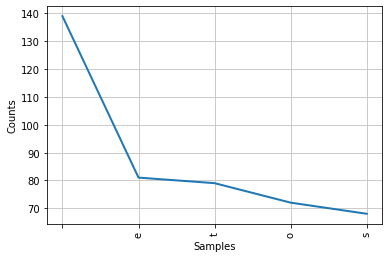

[('AngelList', 'ORG'), ('the API.The Accreditation Report', 'ORG'), ('SEC', 'ORG'), ('atangel.co/accreditation', 'ORG')]


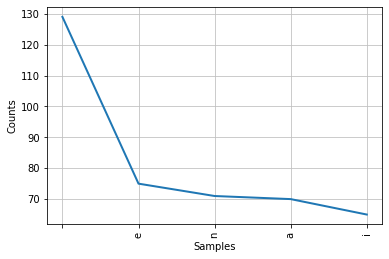

[('over $1M', 'MONEY'), ('Mitch Kapor', 'PERSON'), ('Charlie Cheever', 'PERSON'), ('Betaworks', 'LOC'), ('they&rsquo;re', 'CARDINAL'), ('as little as $1k', 'MONEY'), ('One', 'CARDINAL'), ('90%', 'PERCENT'), ('Invest Online', 'PERSON')]


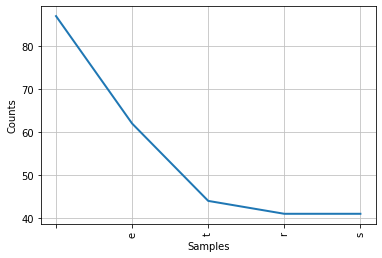

[('250k', 'MONEY'), ('25k', 'MONEY'), ('20%', 'PERCENT'), ('200K.', 'MONEY'), ('Tim', 'PERSON'), ('250', 'MONEY'), ('startup.12', 'GPE'), ('Tim Ferriss', 'PERSON'), ('Jeff Schox', 'PERSON'), ('over $3M', 'MONEY'), ('Tim', 'PERSON'), ('Tim', 'PERSON'), ('Tim', 'PERSON'), ('Tim', 'PERSON'), ('Tim', 'PERSON'), ('startup?Startups', 'PERSON'), ('Tim', 'PERSON'), ('5-10x', 'DATE'), ('up to 95', 'CARDINAL')]


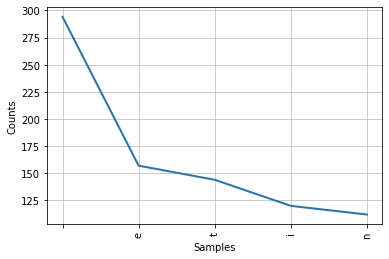

[('5 years', 'DATE')]


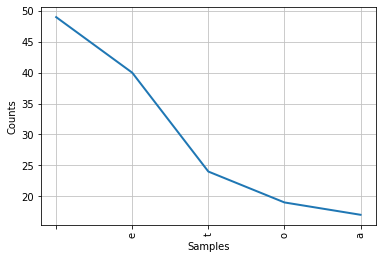

[('Julia DeWahl', 'PERSON'), ('Silicon Valley', 'LOC'), ('Linear', 'ORG'), ('Sequoia', 'ORG'), ('Modern Fertility', 'WORK_OF_ART'), ('USV', 'ORG'), ('Primer', 'PERSON'), ('Julia', 'GPE'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('10', 'CARDINAL'), ('Opendoor', 'ORG'), ('first', 'ORDINAL'), ('SellerThe', 'ORG'), ('20VC', 'CARDINAL'), ('Julia DeWahl', 'PERSON'), ('Angel Investor', 'FAC'), ('first', 'ORDINAL'), ('The Twenty Minute VC', 'WORK_OF_ART')]


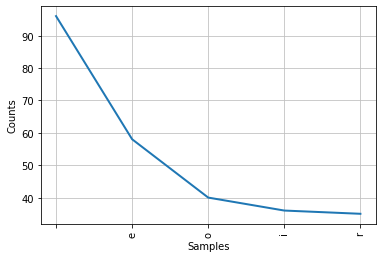

[('Oren Zeev', 'PERSON'), ('one', 'CARDINAL'), ('Silicon Valley', 'LOC'), ('the past decade', 'DATE'), ('Oren', 'ORG'), ('TripActions', 'ORG'), ('Tipalti', 'ORG'), ('Audible', 'ORG'), ('Houzz', 'NORP'), ('Chegg', 'ORG'), ('Hippo Insurance', 'ORG'), ('Zeev Ventures', 'ORG'), ('Oren', 'ORG'), ('12 years', 'DATE'), ('20VC', 'CARDINAL'), ('first', 'ORDINAL'), ('The Twenty Minute VC', 'WORK_OF_ART')]


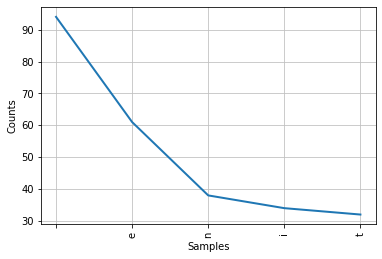

[('Lo Toney', 'PERSON'), ('Precursor', 'GPE'), ('Boldstart', 'ORG'), ('Female Founders Fund', 'ORG'), ('WorkBench', 'ORG'), ('StyleSeat', 'ORG'), ('Plexo', 'PERSON'), ('Lo', 'PERSON'), ('Google Ventures', 'ORG'), ('20VC', 'CARDINAL'), ('Lo Toney', 'PERSON'), ('first', 'ORDINAL'), ('The Twenty Minute VC', 'WORK_OF_ART')]


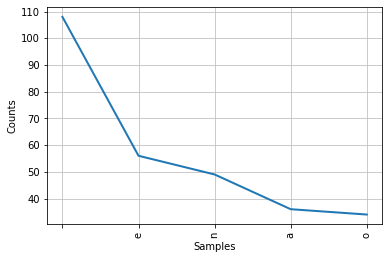

[('Andrew Wilkinson', 'PERSON'), ('the Managing Partner @', 'LAW'), ('MetaLab', 'PERSON'), ('Supercast', 'ORG'), ('Tiny', 'PERSON'), ('Superhuman', 'FAC'), ('SpaceX', 'GPE'), ('Pitch', 'ORG'), ('Buffer', 'ORG'), ('Today', 'DATE'), ('Andrew', 'PERSON'), ('20VC', 'CARDINAL'), ('Andrew Wilkinson', 'PERSON'), ('Building The Berkshire Hathway of Tech, Sustainable vs Unsustainable Growth and The Relationship Between Money and Freedom', 'WORK_OF_ART'), ('first', 'ORDINAL'), ('The Twenty Minute VC', 'WORK_OF_ART')]


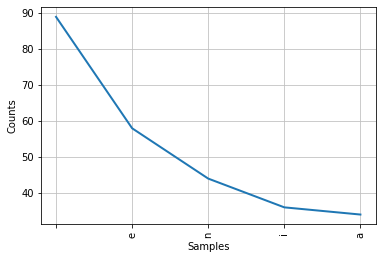

[('David Sacks', 'PERSON'), ('the Co-Founder @', 'ORG'), ('Silicon Valley', 'LOC'), ('David s', 'PERSON'), ('Facebook', 'GPE'), ('Tesla', 'NORP'), ('SpaceX', 'GPE'), ('Palantir, Affirm', 'ORG'), ('Slack', 'ORG'), ('David', 'PERSON'), ('first', 'ORDINAL'), ('COO @', 'WORK_OF_ART'), ('$0-$500M', 'MONEY'), ('theirThe', 'ORG'), ('20VC', 'CARDINAL'), ('David Sacks', 'PERSON'), ('The Twenty Minute VC', 'WORK_OF_ART')]


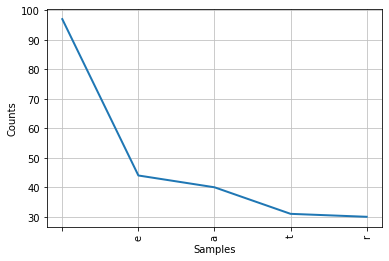

[('Chris Best', 'PERSON'), ('Chris', 'PERSON'), ('over $17M', 'MONEY'), ('a16z', 'FAC'), ('Emmett Shear', 'PERSON'), ('Zynga Co-Founder', 'PERSON'), ('Justin Waldron', 'PERSON'), ('Substack', 'PRODUCT'), ('Chris', 'PERSON'), ('Co-FounderThe', 'ORG'), ('20VC', 'CARDINAL'), ('Substack', 'CARDINAL'), ('Chris Best', 'PERSON'), ('The Future of Public Journalism', 'ORG'), ('first', 'ORDINAL'), ('The Twenty Minute VC', 'WORK_OF_ART')]


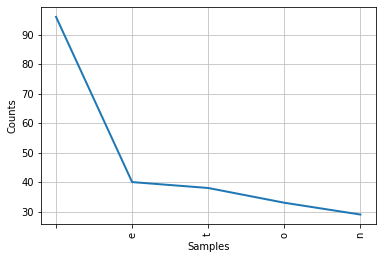

[('Merci Victoria Grace', 'PERSON'), ('the last decade', 'DATE'), ('Snapchat', 'GPE'), ('Mulesoft', 'GPE'), ('Affirm', 'ORG'), ('AppDynamics', 'ORG'), ('Merci', 'GPE'), ('Merci', 'ORG'), ('3 years', 'DATE'), ('teamThe', 'ORG'), ('20VC', 'CARDINAL'), ('Lightspeed Partner', 'PERSON'), ('Merci Victoria Grace', 'PERSON'), ('The Future of Collaboration Tools', 'ORG'), ('The Twenty Minute VC', 'WORK_OF_ART')]


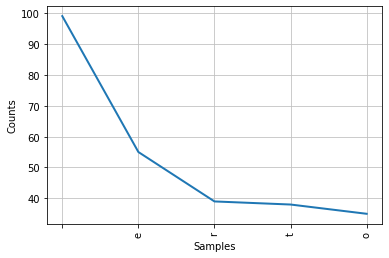

[('One', 'CARDINAL'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


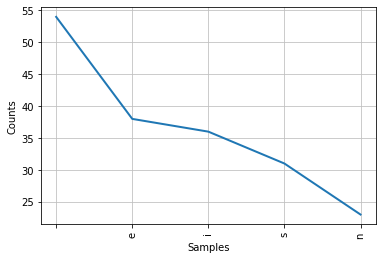

[('decades', 'DATE'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


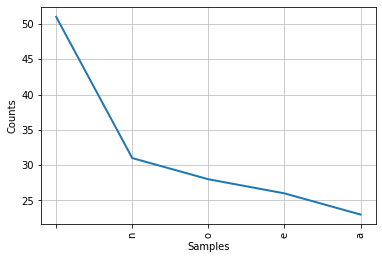

[('Apple', 'ORG'), ('this week', 'DATE'), ('16 Minutes', 'TIME'), ('one', 'CARDINAL'), ('Apple', 'ORG'), ('App Clips', 'NORP'), ('App Clips', 'PERSON'), ('16 Minutes', 'TIME'), ('35', 'MONEY'), ('Apple App Clips', 'ORG'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


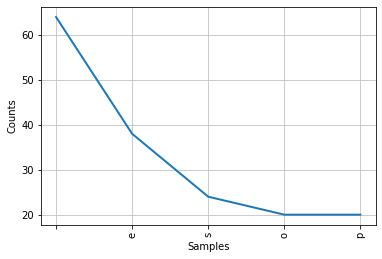

[('a16z', 'ORG'), ('Journal Club', 'ORG'), ('FDA', 'ORG'), ('first', 'ORDINAL'), ('Akili Interactive', 'ORG'), ('EndeavorRx', 'PRODUCT'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


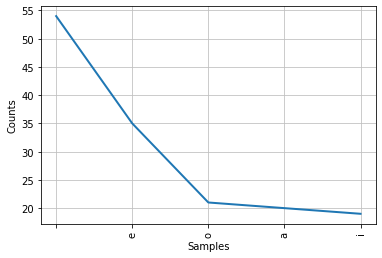

[('one', 'CARDINAL'), ('Gross Margins', 'PERSON'), ('Don', 'PERSON'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


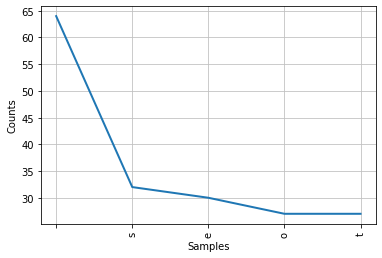

[('the past decade', 'DATE'), ('fintech companies', 'ORG'), ('Runway', 'ORG'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


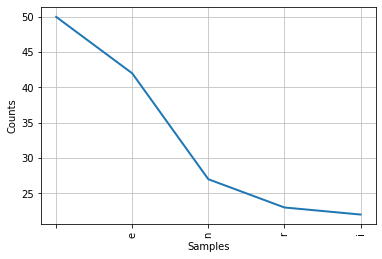

[('first', 'ORDINAL'), ('monthly', 'DATE'), ('a16z fintech newsletter', 'ORG'), ('the latest fintech news', 'ORG'), ('prospectsThe', 'ORG'), ('estateBig fintech', 'NORP'), ('Big fintech', 'ORG'), ('Behind', 'ORG'), ('Hertz', 'ORG'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


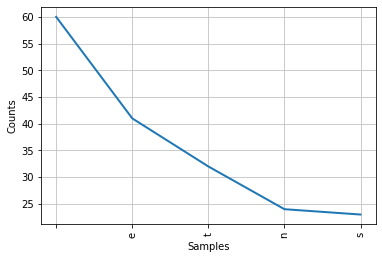

[('Andreessen Horowitz', 'PERSON')]


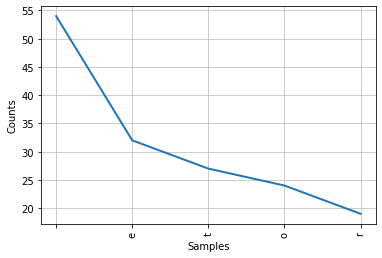

[('COVID-19', 'ORG'), ('half', 'CARDINAL'), ('over 40%', 'PERCENT'), ('16', 'CARDINAL'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


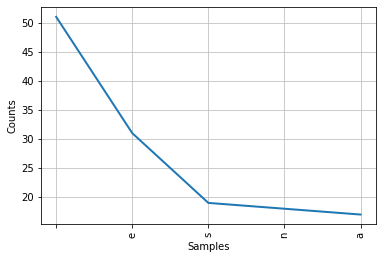

[('Today', 'DATE'), ('four', 'CARDINAL'), ('UI', 'ORG'), ('UI', 'ORG'), ('UI', 'ORG'), ('first', 'ORDINAL'), ('Andreessen Horowitz', 'PERSON')]


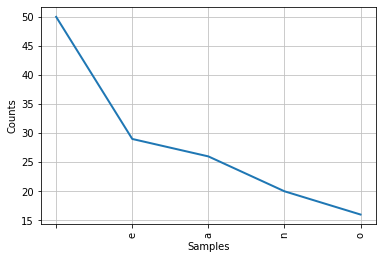

[('Nick', 'PERSON'), ('Kickstarter', 'PERSON'), ('yesterday', 'DATE'), ('Second Chance Studio', 'FAC'), ('Kickstarter', 'PERSON')]


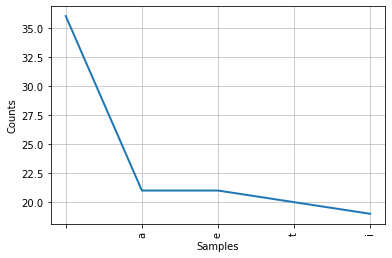

[('$30mm', 'MONEY')]


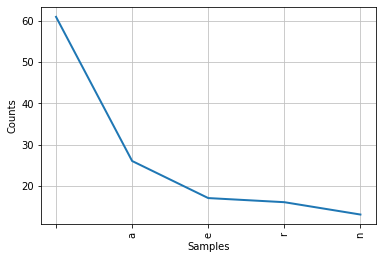

[('this morning', 'TIME'), ('six feet', 'QUANTITY')]


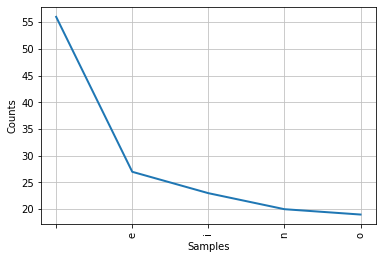

[('this past weekend', 'DATE'), ('Yahoo', 'ORG'), ('AOL', 'ORG')]


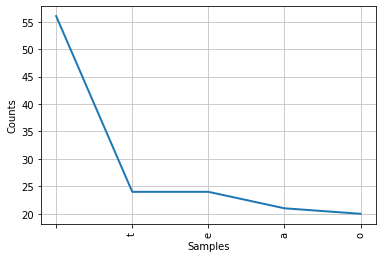

[('over three months', 'DATE'), ('the coming months', 'DATE')]


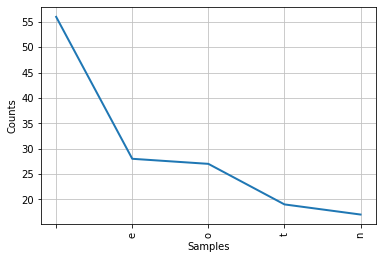

[('Covid', 'NORP'), ('early April', 'DATE'), ('NY', 'GPE'), ('yesterday', 'DATE'), ('$1mm', 'MONEY'), ('almost 350', 'CARDINAL'), ('ten weeks', 'DATE')]


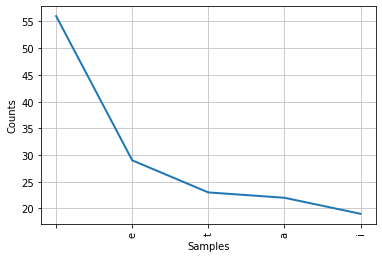

[]


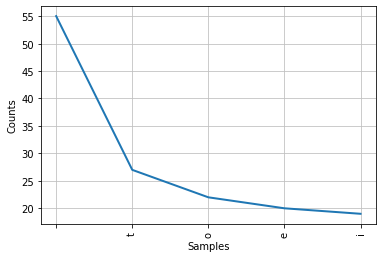

C:\Users\Rohan\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[('today', 'DATE'), ('Tether', 'PERSON'), ('10bn', 'MONEY'), ('third', 'ORDINAL'), ('Bitcoin', 'GPE'), ('USDC', 'GPE'), ('US', 'GPE'), ('Circle', 'PERSON')]


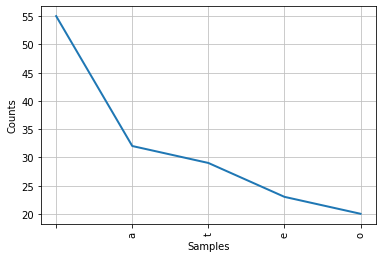

[('AVC', 'ORG'), ('daily', 'DATE'), ('Ten years ago', 'DATE'), ('monthly', 'DATE'), ('100k', 'CARDINAL'), ('around 60k', 'DATE'), ('the same ten year period', 'DATE'), ('daily', 'DATE'), ('2,500', 'CARDINAL'), ('over 30k', 'CARDINAL')]


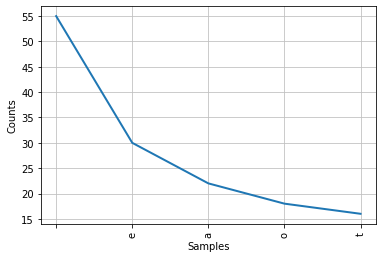

[('Rosetta', 'PRODUCT'), ('Rosetta', 'PERSON'), ('the Coinbase Exchange', 'ORG'), ('Coindesk', 'PERSON')]


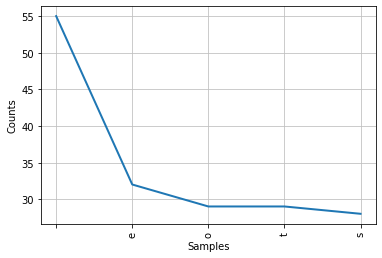

[('Viktor Forgacs', 'ORG'), ('Dan Primacks', 'PERSON'), ('Pro Rata', 'PERSON'), ('Klobucher', 'PERSON'), ('Uber', 'PERSON'), ('Grubhub', 'ORG'), ('Uber buys Grubhub', 'PERSON'), ('Seamless', 'ORG'), ('Uber Eats / Grubhub', 'PERSON'), ('DoorDash', 'PRODUCT'), ('two', 'CARDINAL'), ('90%', 'PERCENT'), ('Klobuchars', 'PERSON'), ('Uber', 'PERSON'), ('27%', 'PERCENT'), ('DoorDash', 'PRODUCT'), ('PostMates', 'ORG'), ('one day', 'DATE'), ('Amazon', 'ORG'), ('Australia', 'GPE'), ('Therein', 'PERSON'), ('AOL TimeWarner', 'ORG'), ('10–15%', 'PERCENT'), ('2', 'CARDINAL'), ('5', 'CARDINAL'), ('Mexican', 'NORP'), ('Thai', 'NORP'), ('Groupon', 'PERSON'), ('Groupon', 'PERSON'), ('Upfront', 'GPE'), ('several years ago', 'DATE'), ('ChowNow', 'ORG'), ('ChowNow', 'ORG'), ('SaaS', 'ORG'), ('the past several year', 'DATE'), ('10–15%', 'PERCENT'), ('100%', 'PERCENT'), ('third', 'ORDINAL'), ('Amazon', 'ORG'), ('Walmart', 'LOC'), ('17,000', 'CARDINAL'), ('SaaS', 'ORG'), ('more than 2,000 / month', 'CARDINAL'),

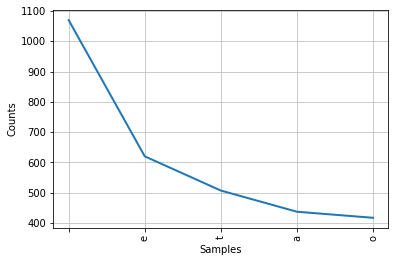

[('$15 million', 'MONEY'), ('ProveItThe', 'CARDINAL'), ('Bevy', 'ORG'), ('$15 million', 'MONEY'), ('WFH', 'ORG'), ('Salesforce', 'ORG'), ('America', 'GPE'), ('Marc Benioff', 'PERSON'), ('Salesforce', 'PERSON'), ('pitch.92%', 'PERCENT'), ('only 22%', 'PERCENT'), ('CrossFit', 'ORG'), ('Barrys or Peloton', 'ORG'), ('Peloton', 'ORG'), ('First Round Capital and True Ventures', 'ORG'), ('15 years ago', 'DATE'), ('SaaStr', 'ORG'), ('annual', 'DATE'), ('Jason Lemkin', 'PERSON'), ('Years ago', 'DATE'), ('Derek Andersen', 'PERSON'), ('Startup Grind', 'ORG'), ('Startup Grind', 'PERSON'), ('Derek', 'PERSON'), ('Clayton Christensen', 'FAC'), ('The Innovators Dilemma', 'ORG'), ('Derek', 'PERSON'), ('Clay', 'PERSON'), ('Derek', 'PERSON'), ('Startup Grind', 'PERSON'), ('Clay Christensen', 'PERSON'), ('7 years ago', 'DATE'), ('Startup Grind', 'PERSON'), ('2011', 'DATE'), ('20', 'CARDINAL'), ('one', 'CARDINAL'), ('600', 'CARDINAL'), ('more than 2 million', 'CARDINAL'), ('Derek', 'PERSON'), ('Bevy', 'PER

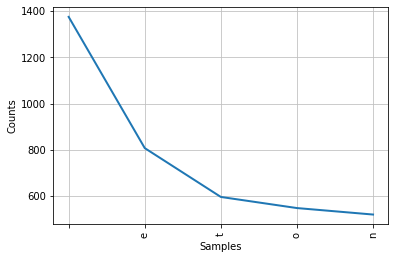

[('Several years ago', 'DATE'), ('20 Minute VC', 'TIME'), ('Harry', 'PERSON'), ('this past week', 'DATE'), ('Harry', 'PERSON'), ('SaaS', 'ORG'), ('Harry', 'PERSON'), ('later in the year', 'DATE'), ('22 million', 'CARDINAL'), ('just 4 weeks', 'DATE'), ('only 17.6 million', 'CARDINAL'), ('California', 'GPE'), ('only 8.7 million', 'CARDINAL'), ('the Great Recession', 'EVENT'), ('Lines', 'ORG'), ('Not Dots', 'ORG'), ('$2–5 million', 'MONEY'), ('$50 million', 'MONEY'), ('Robinhood', 'LOC'), ('the years ahead', 'DATE'), ('1', 'CARDINAL'), ('0', 'CARDINAL'), ('Ill', 'PERSON'), ('SPV', 'ORG'), ('Upfront', 'ORG'), ('89%', 'PERCENT'), ('Seed &amp', 'ORG'), ('11%', 'PERCENT'), ('33%', 'PERCENT'), ('66%As)Why', 'CARDINAL'), ('Will Happen', 'PERSON'), ('LP', 'ORG'), ('VC', 'ORG'), ('VC', 'ORG'), ('MJ', 'GPE'), ('Kobe', 'GPE'), ('LeBron', 'PERSON'), ('Upfront', 'GPE'), ('at least a second', 'CARDINAL'), ('Upfront', 'GPE'), ('$3–5 million', 'MONEY'), ('19–22%', 'PERCENT'), ('20%', 'PERCENT'), ('Upfro

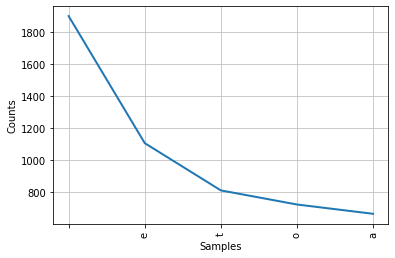

[('Stuart Lander', 'ORG'), ('Upfront', 'ORG'), ('pointedout).Am', 'ORG'), ('US', 'GPE'), ('CompanyCounsel', 'ORG'), ('Coronavirus Aid Relief &amp', 'ORG'), ('Economic Security', 'ORG'), ('$2 trillion', 'MONEY'), ('Covid-19.$350 billion', 'MONEY'), ('PPP', 'ORG'), ('SBA', 'ORG'), ('US', 'GPE'), ('WFH', 'ORG'), ('10 million', 'CARDINAL'), ('the past 2 weeks', 'DATE'), ('2-week', 'CARDINAL'), ('Main Street', 'FAC'), ('One', 'CARDINAL'), ('the PPP Loan', 'ORG'), ('the next couple of months', 'DATE'), ('the US Government', 'ORG'), ('the US Government', 'ORG'), ('I?The', 'ORG'), ('US', 'GPE'), ('first', 'ORDINAL'), ('first', 'ORDINAL'), ('FIFO', 'ORG'), ('KYC', 'ORG'), ('AML', 'ORG'), ('two', 'CARDINAL'), ('SVB', 'ORG'), ('Silicon Valley Bank', 'ORG'), ('FRB', 'ORG'), ('First Republic Bank', 'ORG'), ('the Affiliate Rule', 'LAW'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('the Affiliate Rule', 'LAW'), ('50%', 'PERCENT'), ('20%', 'PERCENT'), ('the Affiliate Rule', 'LAW'), ('20%', 'PERCENT'), ('Na

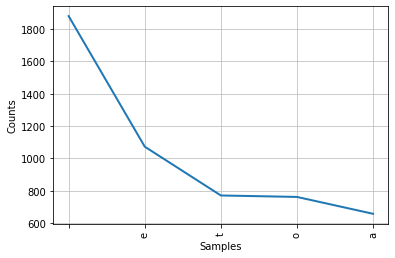

[('the past two weeks', 'DATE'), ('just 60 days', 'DATE'), ('Just two weeks', 'DATE'), ('Winter', 'GPE'), ('weekly', 'DATE'), ('PLEASE', 'GPE'), ('tomorrow', 'DATE'), ('today', 'DATE'), ('the past two weeks', 'DATE'), ('25%', 'PERCENT'), ('travel &amp', 'ORG'), ('a few more weeks', 'DATE'), ('willpersist?How', 'ORG'), ('one', 'CARDINAL'), ('1–1', 'CARDINAL'), ('2–1', 'DATE'), ('Zoom', 'PERSON'), ('Empathy', 'PERSON'), ('The month of March, 2020', 'DATE'), ('Annie Spratt', 'ORG'), ('Both Sides of the Table on Medium', 'WORK_OF_ART')]


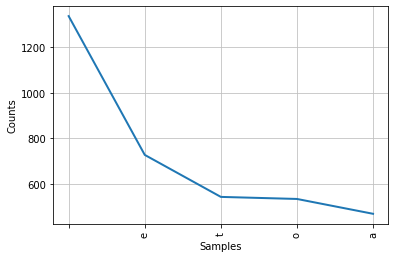

[('next week', 'DATE'), ('Wednesday, March 11th', 'DATE'), ('10:45 AM', 'TIME'), ('Upfront', 'GPE'), ('SaaStr', 'PERSON'), ('SlideShare', 'ORG'), ('Both Sides of the Table on Medium', 'WORK_OF_ART')]


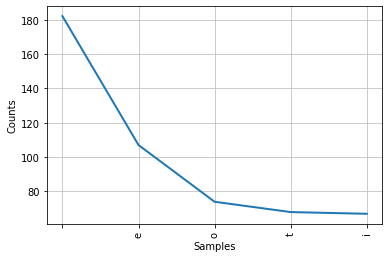

[('Every year', 'DATE'), ('Upfront Summit', 'ORG'), ('last years', 'DATE'), ('Reid Hoffman', 'PERSON'), ('Birds Travis VanderZanden', 'ORG'), ('Maker Studios', 'ORG'), ('the Upfront Summit', 'ORG'), ('a few weeks ago', 'DATE'), ('Meg Whitman', 'GPE'), ('Quibi', 'PERSON'), ('Meg', 'ORG'), ('many years', 'DATE'), ('Hewlett Packard', 'ORG'), ('eBay', 'ORG'), ('late 2018', 'DATE'), ('Quibi', 'ORG'), ('Jeffrey Katzenberg', 'PERSON'), ('first', 'ORDINAL'), ('more than $', 'MONEY'), ('first', 'ORDINAL'), ('Meg', 'ORG'), ('Quibis', 'GPE'), ('April 6thlaunch', 'DATE'), ('the entire 30 minute', 'TIME'), ('Quibi', 'GPE'), ('Meg', 'ORG'), ('Ill', 'PERSON'), ('QuibicontentIn', 'ORG'), ('Netflix', 'GPE'), ('Hulu', 'ORG'), ('HBO', 'ORG'), ('YouTube', 'ORG'), ('4.99', 'MONEY'), ('monthly', 'DATE'), ('8', 'MONEY'), ('Quibi', 'ORG'), ('Quibi', 'LOC'), ('only 10%', 'PERCENT'), ('the day', 'DATE'), ('7', 'CARDINAL'), ('10-minute', 'QUANTITY'), ('The Da Vinci Code', 'WORK_OF_ART'), ('464', 'CARDINAL'), ('1

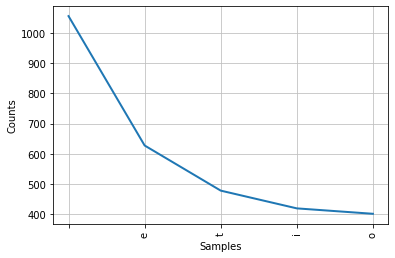

[('12 years ago', 'DATE'), ('2007', 'DATE'), ('Salesforce.com', 'ORG'), ('VP', 'ORG'), ('Products', 'ORG'), ('second', 'ORDINAL'), ('VC', 'ORG'), ('nearly a year', 'DATE'), ('first', 'ORDINAL'), ('just over 10 years ago', 'DATE'), ('Invoca', 'ORG'), ('$56 million', 'MONEY'), ('Scott Hilleboe', 'PERSON'), ('HIG Growth Partners', 'ORG'), ('10years.1', 'CARDINAL'), ('VC', 'ORG'), ('overnight', 'TIME'), ('10s', 'ORDINAL'), ('millions', 'CARDINAL'), ('75%', 'PERCENT'), ('the first 3 years', 'DATE'), ('Dish Networks', 'PERSON'), ('Dignity Health', 'ORG'), ('U.S. Bank', 'ORG'), ('Gusto', 'PERSON'), ('MakeSpace', 'PERSON'), ('Google, Adobe', 'ORG'), ('Salesforce', 'ORG'), ('Upfront', 'ORG'), ('18', 'CARDINAL'), ('$1 billion', 'MONEY'), ('more than 10 years', 'DATE'), ('Kyriba', 'PERSON'), ('above $1 billion', 'MONEY'), ('$100 million', 'MONEY'), ('MattersAt Upfront', 'GPE'), ('$500k—$15 million', 'MONEY'), ('three', 'CARDINAL'), ('50', 'MONEY'), ('Invoca', 'ORG'), ('Accel', 'PERSON'), ('Morgan

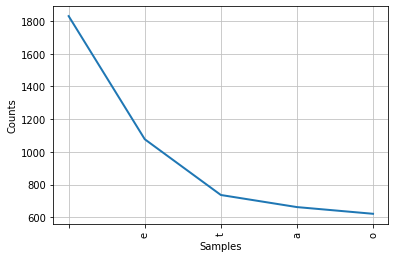

[('six years ago', 'DATE'), ('Ynon Kreiz', 'PERSON'), ('Andrew Stalbow', 'PERSON'), ('Petri Järvilehto', 'GPE'), ('Ynon', 'PERSON'), ('Maker Studios', 'ORG'), ('Andrew', 'PERSON'), ('Petri', 'NORP'), ('Angry Birds', 'ORG'), ('first', 'ORDINAL'), ('Best Fiends', 'ORG'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('Santa Monica', 'GPE'), ('first', 'ORDINAL'), ('prettygood.https://medium.com/media/db1d3123ccf8670b8f985fef99ccb830/hrefTheir', 'FAC'), ('Disney', 'ORG'), ('hundreds of millions', 'MONEY'), ('first', 'ORDINAL'), ('Upfront', 'GPE'), ('Kevin Zhang)—he', 'PERSON'), ('Upfront', 'GPE'), ('$150 billion', 'MONEY'), ('Kevin', 'PERSON'), ('100%', 'PERCENT'), ('Upfront', 'ORG'), ('Andrew', 'PERSON'), ('LA', 'GPE'), ('Andrew', 'PERSON'), ('VC', 'ORG'), ('Petri', 'NORP'), ('Finland', 'GPE'), ('two', 'CARDINAL'), ('one', 'CARDINAL'), ('Helsinki', 'ORG'), ('Today', 'DATE'), ('Playtika', 'GPE'), ('Andrew', 'NORP'), ('Petri', 'NORP'), ('these years', 'DATE'), ('one', 'CARDINAL'), ('first', 'O

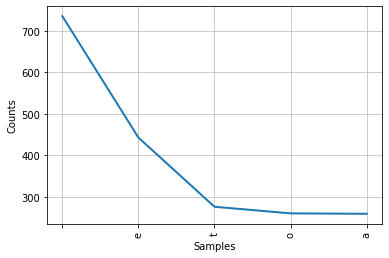

[('Trevor OBrien', 'PERSON'), ('Projector', 'ORG'), ('Defy Ventures', 'ORG'), ('Trevor', 'ORG'), ('YouTube', 'ORG'), ('Upfront', 'GPE'), ('YouTube', 'ORG'), ('MakerStudios', 'ORG'), ('Trevor', 'ORG'), ('Jeremy Gordon', 'PERSON'), ('Twitter', 'ORG'), ('Upfront', 'GPE'), ('VC', 'ORG'), ('Rishi Garg', 'PERSON'), ('Mayfield', 'PERSON'), ('Projector', 'PERSON'), ('today', 'DATE'), ('TechCrunch', 'ORG'), ('Today', 'DATE'), ('Keynote/Powerpoint/Slides', 'ORG'), ('Adobe', 'ORG'), ('iMovie', 'ORG'), ('FinalCutPro', 'PRODUCT'), ('one', 'CARDINAL'), ('tool &amp', 'ORG'), ('examples?You', 'ORG'), ('Keynote', 'GPE'), ('Keynote', 'GPE'), ('5', 'CARDINAL'), ('Projector', 'GPE'), ('Gifs', 'PERSON'), ('one', 'CARDINAL'), ('hour', 'TIME'), ('Instagram', 'PERSON'), ('Projector', 'PERSON'), ('Projector', 'GPE'), ('Google Docs', 'ORG'), ('youthink!Announcing Projector', 'ORG'), ('Years', 'DATE'), ('Both Sides of the Table on Medium', 'WORK_OF_ART')]


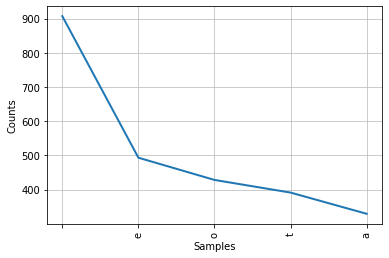

[('The GoingVC Venture Capital Interview Guide', 'ORG'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


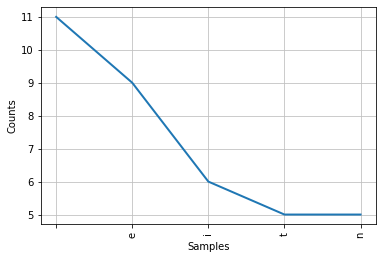

[('Venture Capital Term Sheets', 'ORG'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


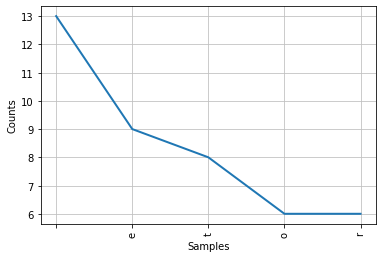

[('The Complete Guide to Venture Capital', 'ORG')]


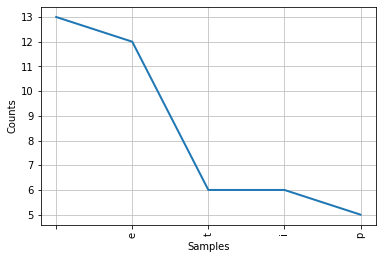

[]


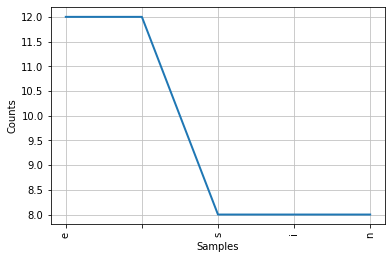

C:\Users\Rohan\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[('White Paper', 'ORG'), ('the VC Juice Worth the Squeeze', 'ORG'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


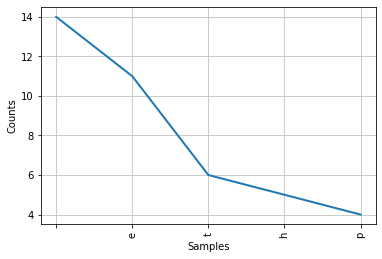

[('6', 'CARDINAL'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


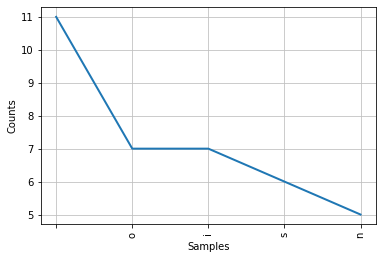

[('Venture Capital', 'ORG'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


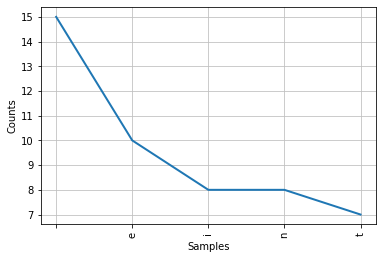

[('GoingVC', 'ORG')]


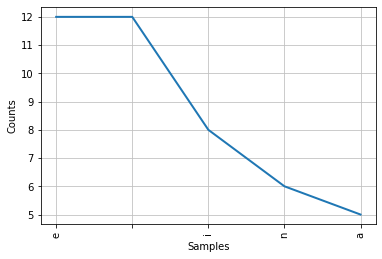

[('GoingVC', 'ORG')]


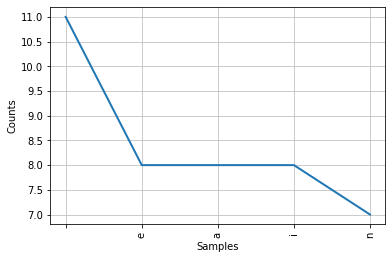

[('101', 'CARDINAL'), ('first', 'ORDINAL'), ('GoingVC', 'ORG')]


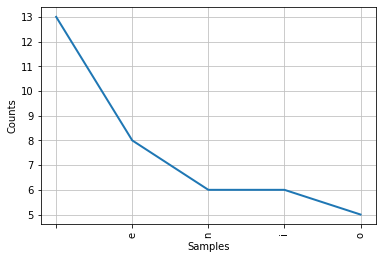

In [5]:

import nltk
from nltk.corpus import stopwords
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
import json
nlp = en_core_web_sm.load()
from bs4 import BeautifulSoup
import requests
import re
from operator import itemgetter
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


print("total_number of news: {} ".format(len(allheadlines)))
print("\n")
j = 1
for i,z in zip(allheadlines,allheadDesc):
    headlines = clean_text_round1(i)
    body_news = clean_text_round1(z)

    labels = [(x.text,x.label_)  for x in nlp(body_news).ents]
    labels_count = Counter(labels)  
    print(labels)   ##Labels of the data
    #for m in labels_count:
       # print("Name : {} , Entity : {}".format(m[0][0],m[0][1]))
    #items = [x.text for x in nlp(body_news).ents]                       ##Text of the Labels
    #items_count = Counter(items).most_common(3)
    #for m , n in zip(items_count,labels_count):                  ##Geting the name of the coompany/topic name using Text(labels)
        #print(j,"name: {} , entity: {}".format(m[0],n[0]))
        #continue
    freq = nltk.FreqDist(body_news)
    freq.plot(5, cumulative=False)
    displacy.render(nlp(body_news), jupyter=True, style='ent')